<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001_DL_Lab(CSE6037)_Implementation_of_4_different_types_of_AUTOENCODERS_Activity_1_Asgn_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL-Lab-CSE6037_Lab-Assignment-6_Activity-1_Implementation_of_4-different-types_of_AUTOENCODERS---(A)Vanilla Autoencoder , (B)Convolutional Autoencoder , (C)Regularized Autoencoder - i) Sparse Autoencoder, ii)Denoising Autoencoder, (D)Multilayer Autoencoder _with_the_MNIST-dataset.

#Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link : 

#A brief Note on Autoencoders :

Autoencoders (AE) are Neural Networks Models that are trained  to copy their inputs to their outputs. They function by compressing the input into a latent-space representation, and then reconstructing the output from this representation. 

This kind of Network is composed of 2 main parts :
    


1) Encoder: This is the part of the Autoencoder Network that compresses the input into a latent-space representation. 
             It can be represented by an Encoding Function - h=f(x).

    

2) Decoder: This part of the Autoencoder Network works to reconstruct the input from the latent space representation. 
             It can be represented by a Decoding Function - r=g(h).

#Illustraion of the working of an Autoencoder Network Model with all it's main / basic parts :

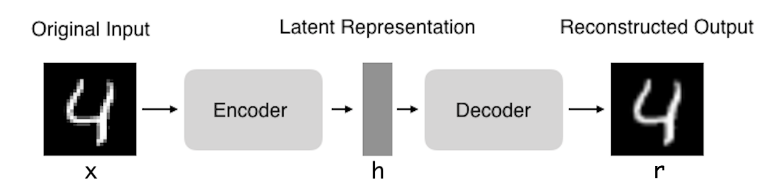

In [359]:
#Importing necesssary libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Lambda, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# A) Vannilla Autoeccoder:  

#To Load the MNIST dataset and Reshape it :

In [360]:
(X_train, _), (X_test, _) = mnist.load_data()

To Reshape the Train and Test sets of the input dataset :

In [361]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data : 
To convert the pixels values between 0 and 1 instead of between 0 and 255

In [362]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.



To print the shape of the Train and Test sets of the input MNIST dataset :

In [363]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To perform Flattening of the input images of both the train and test sets of the input MNIST dataset for the  Network of the Vanilla Autoencoder  :

In [364]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Implementation of the A) Vanilla Autoencoder :

To Create the Network for building the Vanilla Autoencoder : which is a simple autoencoder that has three main parts : 1)Input , 2)Encoder,3) Decoder

In [365]:
#input_size = 784
hidden_size = 64
output_size = 784

#Adding the different layers to the Vanilla Autoencoder Model being developed : 

In [366]:
#Input layer
x = Input(shape=(784,))

#Encoder Layer
h = Dense(hidden_size, activation='relu')(x)

#Decoder Layer
r = Dense(output_size, activation='sigmoid')(h)

#Constructing the Vanilla Autoencoder model being developed :
vnl_autoencoder = Model(inputs=x, outputs=r)


#Model Summary of the Vanilla Autoencoder Model developed :

In [367]:
#Model Summary
vnl_autoencoder.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_33 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


To Compile the Vanilla Autoencoder Model developed :

In [368]:
vnl_autoencoder.compile(optimizer='adam', loss='mse')

In [369]:
#save the trained model to a file so that it can be used to make predictions later :
vnl_autoencoder.save("vnl.h5")

#To train the Vanilla Autoencoder Model developed :

In [370]:
epochs = 5
batch_size = 128

history = vnl_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0744 - val_loss: 0.0230
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.0130
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0120 - val_loss: 0.0088
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0055


To plot a few predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

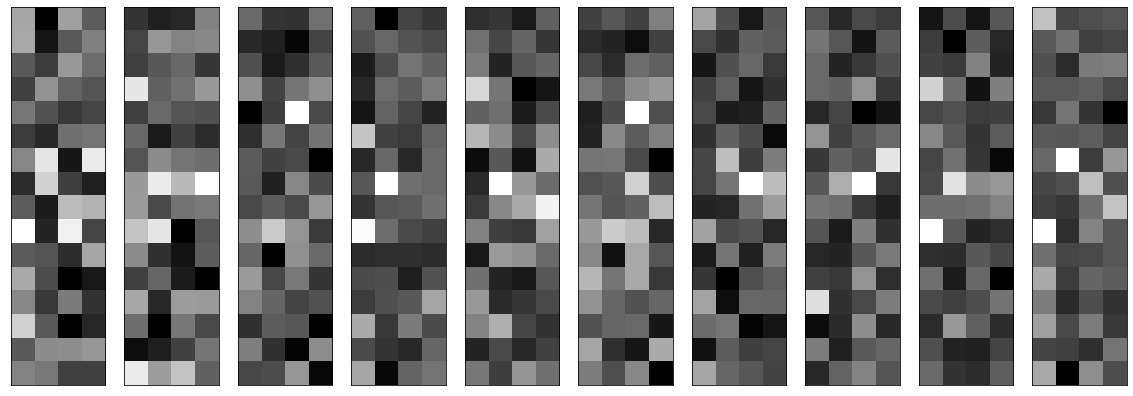

In [371]:
vnl_encoder = Model(x, h)
encoded_imgs1 = vnl_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs1[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

In [372]:
decoded_imgs1 = vnl_autoencoder.predict(X_test)

To Plot the Original/Actual  Test set imagaes of the MNIST dataset :

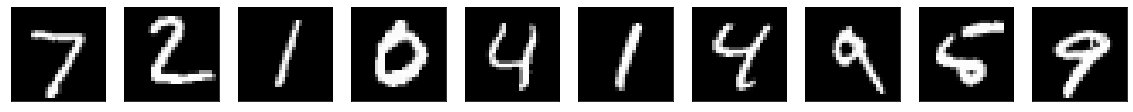

In [373]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#To Plot the predicted Output images of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

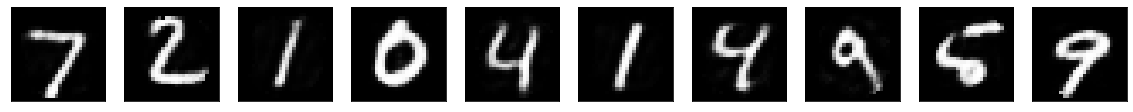

In [374]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
# display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


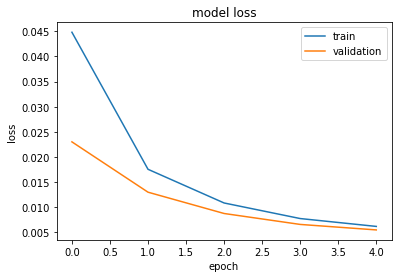

In [375]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#B) Convolutional Autoencoder : 
This Autoencoder Network Model does not take flattened vectors as an input rather it takes directly the images as input 

#To Load the MNIST dataset and Reshape it :

In [376]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()


To Reshape the Train and Test sets of the input dataset :

In [377]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data :

To convert the pixels values between 0 and 1 instead of between 0 and 255

In [378]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

To print the shape of the Train and Test sets of the input MNIST dataset :

In [379]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To convert integer values of the Predictor (Y) variable of both the train and test sets of the input MNIST dataset into binary values for the Network of the Convolutional  Autoencoder:

 

In [380]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#Implementation of the B) Convolutional Autoencoder :

To Create the Network for building the Convolutional Autoencoder : which has three main parts : 1)Input , 2)Encoder,3) Decoder

In [381]:
#Input Section of the Convolutional Autoencoder :
x1 = Input(shape=(28, 28,1)) 

#Adding the different layers to the Convolutional Autoencoder being developed : 

Encoder Section of the Convolutional Autoencoder being developed  :

In [382]:
#1st Convolutional Layer
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)

#2nd Convolutional Layer
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)

#3rd Convolutional Layer
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)

#Output Layer
h1 = MaxPooling2D((2, 2), padding='same')(conv1_3)

Decoder Section of the Convolutional Autoencoder being developed  :

In [383]:
#1st Convolutional Layer
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h1)
up1 = UpSampling2D((2, 2))(conv2_1)

#2nd Convolutional Layer
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)

#3rd Convolutional Layer
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)

#Output Layer
r1 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)


#Constructing the Convolutional Autoencoder Model being developed :

In [384]:

cnv_autoencoder = Model(inputs=x1, outputs=r1)

#Model Summary of the Convolutional Autoencoder Model developed :

In [385]:
#Model Summary
cnv_autoencoder.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 8)           0  

To Compile the Convolutional Autoencoder Model developed :

In [386]:
cnv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [387]:
#save the trained model to a file so that it can be used to make predictions later :
cnv_autoencoder.save("cnv.h5")

#To train the Convolutional Autoencoder Model developed :

In [388]:
epochs = 3
batch_size = 128

history = cnv_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 0.3525 - val_loss: 0.1470
Epoch 2/3
469/469 [==============================] - 3s 5ms/step - loss: 0.1411 - val_loss: 0.1262
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1248 - val_loss: 0.1183


Predictions made by the developed Convolutional Autoencoder Model on the Test set of the MNIST dataset :

In [389]:
decoded_imgs2 = cnv_autoencoder.predict(X_test)

To Plot the Original/Actual Test set imagaes of the MNIST dataset :

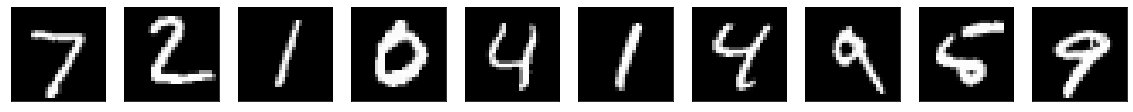

In [390]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#To Plot the predicted Output images of the developed Convolutional Autoencoder Model implemented on the Test set of the MNIST dataset :

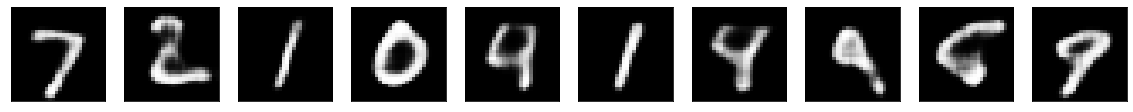

In [391]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#To Plot the losses of the developed Convolutional Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


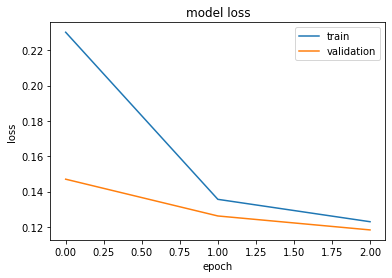

In [392]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#C) Regularized Autoencoder :

This Autoencoder Network Model can be further Classified into 2 types :-

 i) Sparse Autoencoder

 ii) Denoising Autoencoder


#C) i) Sparse (Regularized) Autoencoder :

#To Load the MNIST dataset and Reshape it :

In [393]:
(X_train, _), (X_test, _) = mnist.load_data()

To Reshape the Train and Test sets of the input dataset :

In [394]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data :

To convert the pixels values between 0 and 1 instead of between 0 and 255

In [395]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

To print the shape of the Train and Test sets of the input MNIST dataset :

In [396]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


To perform Flattening of the input images of both the train and test sets of the input MNIST dataset for the Network of the Sparse (Regularized) Autoencoder Model :

In [397]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

#Implementation of the C) i) Sparse (Regularized) Autoencoder :

To Create the Network for building the Sparse (Regularized) Autoencoder  :  that has three main parts : 1)Input , 2)Encoder,3) Decoder

In [398]:
#input_size = 784
hidden_size1 = 32
output_size = 784

#Adding the different layers to the Sparse (Regularized) Autoencoder Model being developed :


In [399]:
#Input layer
x2 = Input(shape=(784,))

#Encoder Layer
h2 = Dense(hidden_size1, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x2)

#Decoder Layer
r2 = Dense(output_size, activation='sigmoid')(h2)

#Constructing the Sparse (Regularized) Autoencoder Model being developed :

In [400]:

rsp_autoencoder = Model(inputs=x2, outputs=r2)

#Model Summary of the Sparse (Regularized) Autoencoder Model developed :

In [401]:
#Model Summary
rsp_autoencoder.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


To Compile the Sparse (Regularized) Autoencoder Model developed :

In [402]:
rsp_autoencoder.compile(optimizer='adam', loss='mse')

In [403]:
#save the trained model to a file so that it can be used to make predictions later :
rsp_autoencoder.save("rsp.h5")

#To train the Sparse (Regularized) Autoencoder Model developed :

In [404]:
epochs = 5
batch_size = 128

history = rsp_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0925 - val_loss: 0.0366
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0342 - val_loss: 0.0275
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0265 - val_loss: 0.0224
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0219 - val_loss: 0.0197
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0183


Predictions made by the developed Sparse (Regularized) Autoencoder Model on the Test set of the MNIST dataset :

In [405]:
decoded_imgs3 = rsp_autoencoder.predict(X_test)

To Plot the Original/Actual Test set imagaes of the MNIST dataset :

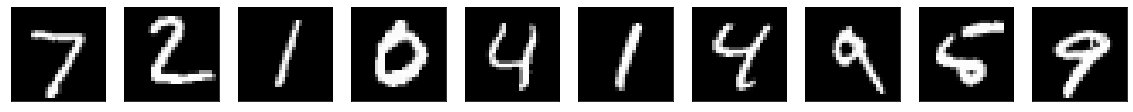

In [406]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#To Plot the predicted Output images of the developed Sparse (Regularized) Autoencoder Model implemented on the Test set of the MNIST dataset :

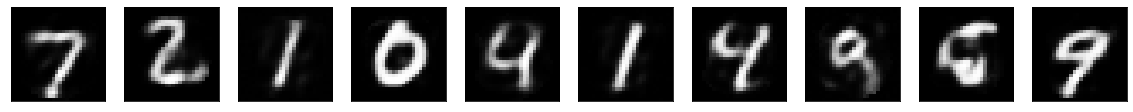

In [407]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Sparse (Regularized) Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


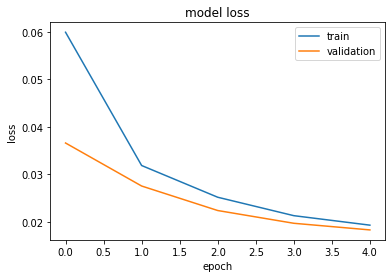

In [408]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#C) ii) Denoising (Regularized) Autoencoder :

#To Load the MNIST dataset and Reshape it :

In [409]:
(X_train, _), (X_test, _) = mnist.load_data()

To Reshape the Train and Test sets of the input dataset :

In [410]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data :

To convert the pixels values between 0 and 1 instead of between 0 and 255

In [411]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

To print the shape of the Train and Test sets of the input MNIST dataset :

In [412]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To improvise and introduce noise in the input images of both the train and test sets of the input MNIST dataset for the Network of the Denoising (Regularized) Autoencoder Model :


In [413]:
noise_factor = 0.5

Creating Noisy Input image data in both the train and test sets of the input MNIST dataset 
for the Network of the Denoising (Regularized) Autoencoder Model :

In [414]:
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 


In [415]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#Implementation of the C) ii) Denoising (Regularized) Autoencoder :

To Create the Network for building the Denoising (Regularized) Autoencoder  :  which has three main parts : 1)Input , 2)Encoder,3) Decoder

#Input Section of the Denoising (Regularized) Autoencoder :

In [416]:

x3 = Input(shape=(28,28,1)) 

#Adding the different layers to the Denoising (Regularized) Autoencoder being developed :

Encoder Section of the Denoising (Regularized) Autoencoder being developed :

In [417]:
#1st Convolutional Layer
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)

#2nd Convolutional Layer
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)

#Output Layer
h3 = MaxPooling2D((2, 2), padding='same')(conv1_2)

Decoder Section of the Denoising (Regularized) Autoencoder being developed :

In [418]:
#1st Convolutional Layer
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h3)
up1 = UpSampling2D((2, 2))(conv2_1)

#2nd Convolutional Layer
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)

#Output Layer
r3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

#Constructing the Denoising (Regularized) Autoencoder Model being developed :

In [419]:
rdn_autoencoder = Model(inputs=x3, outputs=r3)

#Model Summary of the Denoising (Regularized) Autoencoder Model developed :

In [420]:
#Model Summary :
rdn_autoencoder.summary()

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_23 (UpSampling (None, 14, 14, 32)        0  

To Compile the Denoising (Regularized) Autoencoder Model developed :

In [421]:
rdn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [422]:
#save the trained model to a file so that it can be used to make predictions later :
rdn_autoencoder.save("rdn.h5")

#To train the Denoising (Regularized) Autoencoder Model developed :

In [423]:
epochs = 5
batch_size = 128

history = rdn_autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2611 - val_loss: 0.1173
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1158 - val_loss: 0.1081
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1081 - val_loss: 0.1058
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1054 - val_loss: 0.1025
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1032 - val_loss: 0.1010


Predictions made by the developed Denoising (Regularized) Autoencoder Model on the Test set of the MNIST dataset :

In [424]:
decoded_imgs4 = rdn_autoencoder.predict(X_test_noisy)

#To Plot the Original/Actual noisy input images of the test set of the improvised noisy input MNIST dataset for the Network of the Denoising (Regularized) Autoencoder Model :

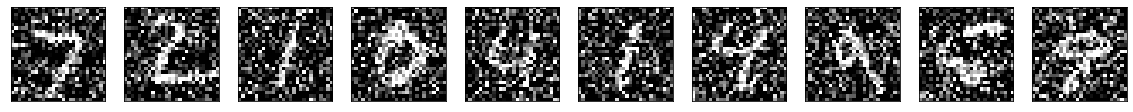

In [425]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#To Plot the predicted Output images of the developed Denoising (Regularized) Autoencoder Model implemented on the Test set of the MNIST dataset :

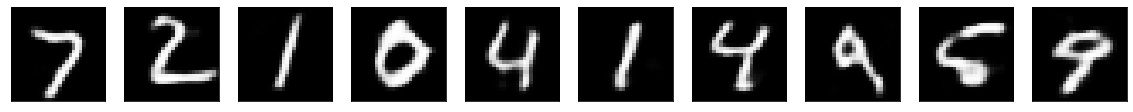

In [426]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs4[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Denoising (Regularized) Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


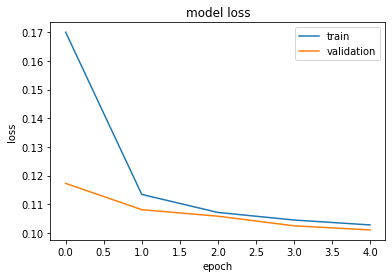

In [427]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#D) Multilayer Autoeccoder:

#To Load the MNIST dataset and Reshape it :

In [428]:
(X_train, _), (X_test, _) = mnist.load_data()

To Reshape the Train and Test sets of the input dataset :

In [429]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data :

To convert the pixels values between 0 and 1 instead of between 0 and 255

In [430]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

To print the shape of the Train and Test sets of the input MNIST dataset :

In [431]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To perform Flattening of the input images of both the train and test sets of the input MNIST dataset for the  Network of the Multilayer Autoencoder  :

In [432]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

#Implementation of the D) Multilayer Autoencoder :

To Create the Network for building the Multilayer Autoencoder : which has three main parts : 1)Input , 2)Encoder,3) Decoder


In [433]:
input_size = 784
hidden_size = 128
code_size = 64

Input Section of the Multilayer Autoencoder :

In [434]:
x4 = Input(shape=(784,))


#Adding the different layers to the Multilayer Autoencoder being developed :


Encoder Section of the Multilayer Autoencoder being developed :


In [435]:
#Encoder 
hidden_1 = Dense(hidden_size, activation='relu')(x4)
h4 = Dense(code_size, activation='relu')(hidden_1)


Decoder Section of the Multilayer Autoencoder being developed :

In [436]:
#Decoder 
hidden_2 = Dense(hidden_size, activation='relu')(h4)
r4 = Dense(input_size, activation='sigmoid')(hidden_2)



#Constructing the Multilayer Autoencoder model being developed :

In [437]:

mul_autoencoder = Model(inputs=x4, outputs=r4)

#Model Summary of the Multilayer Autoencoder Model developed :

In [438]:
mul_autoencoder.summary()

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_39 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


To Compile the Multilayer Autoencoder Model developed :

In [439]:
mul_autoencoder.compile(optimizer='adam', loss='mse')

In [440]:
#save the trained model to a file so that it can be used to make predictions later :
mul_autoencoder.save("mul.h5")

# To train the Multilayer Autoencoder Model developed :

In [353]:
epochs = 5
batch_size = 128

history = mul_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0699 - val_loss: 0.0189
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0128
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0104
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0087
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0077


To plot a few predictions made by the developed Multilayer Autoencoder Model on the Test set of the MNIST dataset :

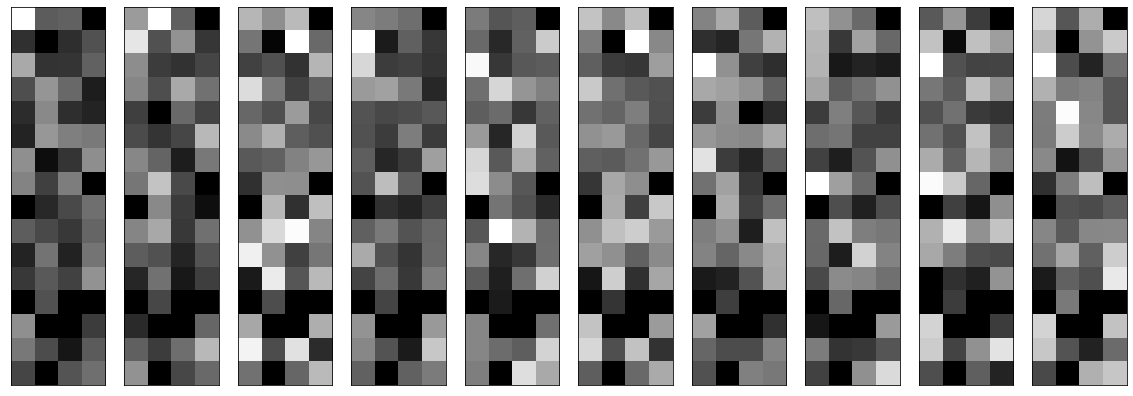

In [354]:
mul_encoder = Model(x4, h4)
encoded_imgs5 = mul_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs5[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Predictions made by the developed Multilayer Autoencoder Model on the Test set of the MNIST dataset :

In [355]:
decoded_imgs5 = mul_autoencoder.predict(X_test)

To Plot the Original/Actual Test set imagaes of the MNIST dataset :

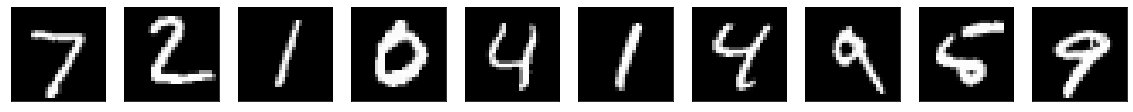

In [356]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#To Plot the predicted Output images of the developed Multilayer Autoencoder Model implemented on the Test set of the MNIST dataset :

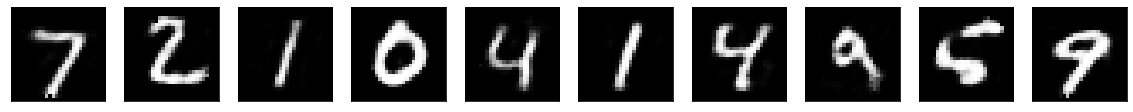

In [357]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
   
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs5[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Multilayer Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


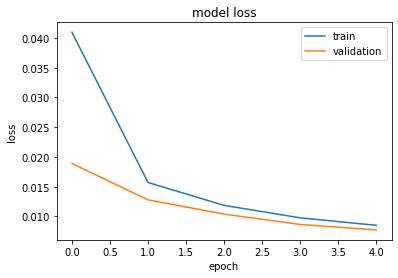

In [358]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()